# ***Lab-7***
# ***Lagrange's and Newton Interpolation***

Kalp Shah - 202201457

Rakshit Pandhi - 202201426

# Polynomial Interpolation Problem

## Problem Statement:

Given the following table of data:

| x    | 3.35  | 3.40  | 3.50  | 3.60  |
|------|-------|-------|-------|-------|
| f(x) | 0.298507 | 0.294118 | 0.285714 | 0.277778 |

### Tasks:

(a) Produce Lagrange polynomials of the linear, quadratic, and cubic orders with increasing values of x.

(b) Produce Newton’s divided-difference polynomial for all the three foregoing orders.

(c) Plot the results of both methods on the same graph and compare them with the function

# **Part - (a) -> Lagrange's Method**

P(x) = 0.59257x^0 + -0.08778x^1
Coefficients: [0.592570000000002, -0.0877800000000013]


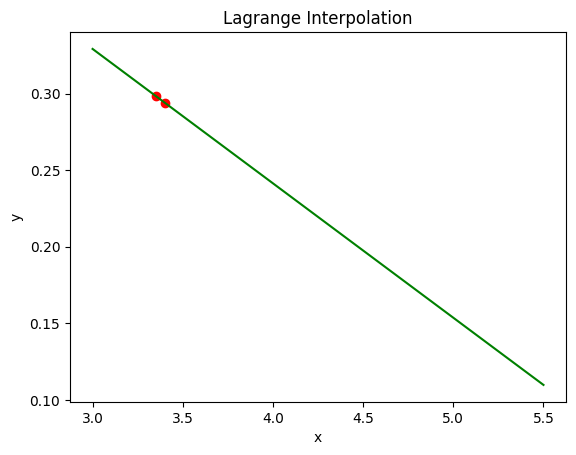

P(x) = 0.87656x^0 + -0.25608x^1 + 0.02493x^2
Coefficients: [0.8765606666667338, -0.25608000000008246, 0.02493333333334391]


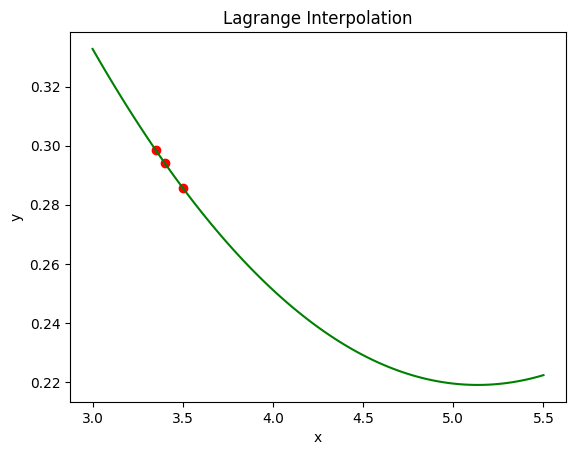

P(x) = 1.12107x^0 + -0.47084x^1 + 0.08780x^2 + -0.00613x^3
Coefficients: [1.1210660000010648, -0.4708386666675324, 0.08780000000047039, -0.006133333333366409]


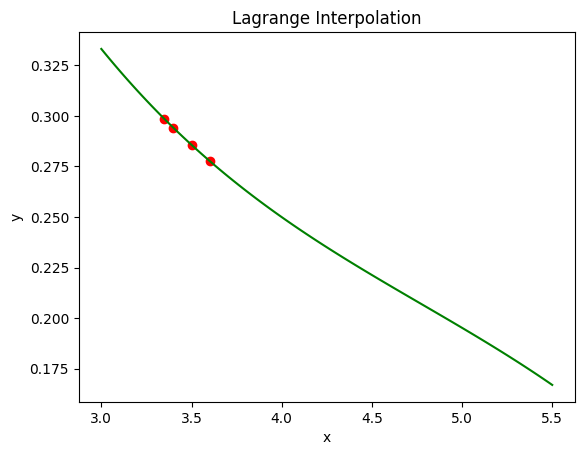

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def mypolyint(data):
  n = len(data)
  x_values = [point[0] for point in data]
  y_values = [point[1] for point in data]
  coeffs = [0] * n
  for i in range(n):
    p = [1]
    for j in range(n):
      if i != j:
        p = poly_mul(p, [-x_values[j] / (x_values[i] - x_values[j]), 1 / (x_values[i] - x_values[j])])
    coeffs = poly_add(coeffs, poly_mul_scalar(p, y_values[i]))

  equation = "P(x) = "
  for i, c in enumerate(coeffs):
    if i > 0:
      equation += " + "
    equation += f"{c:.5f}x^{i}"
  print(equation)
  print("Coefficients:", coeffs)

  x_range=np.linspace(3, 5.5, 100)
  y_interp = [lagrange_interpolation(x_val, x_values, y_values) for x_val in x_range]
  plt.plot(x_range, y_interp,color='green')
  plt.scatter(x_values, y_values, color='red')
  plt.title('Lagrange Interpolation')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return coeffs

def lagrange_interpolation(x, x_values, y_values):
  n = len(x_values)
  interpolated_y = 0
  for i in range(n):
    L_i = 1
    for j in range(n):
      if i != j:
        L_i *= (x - x_values[j]) / (x_values[i] - x_values[j])
    interpolated_y += y_values[i] * L_i
  return interpolated_y


def poly_mul(p1, p2):
  n1 = len(p1)
  n2 = len(p2)
  result = [0] * (n1 + n2 - 1)
  for i in range(n1):
    for j in range(n2):
      result[i + j] += p1[i] * p2[j]
  return result

def poly_add(p1, p2):
  n1 = len(p1)
  n2 = len(p2)
  result = [0] * max(n1, n2)
  for i in range(n1):
    result[i] += p1[i]
  for i in range(n2):
    result[i] += p2[i]
  return result

def poly_mul_scalar(p, s):
  return [c * s for c in p]

data1 = [[3.35,0.298507], [3.40,0.294118]]
coeffs1 = mypolyint(data1)

data2 = [[3.35,0.298507], [3.40,0.294118],[3.50,0.285714]]
coeffs2 = mypolyint(data2)

data3 = [[3.35,0.298507], [3.40,0.294118],[3.50,0.285714],[3.60,0.277778]]
coeffs3 = mypolyint(data3)

# **Part - (b) -> Newton's Method**

P(x) = 0.30 + -0.09(x - 3.35000)
P(x) = 0.59257x^0 - 0.08778x^1


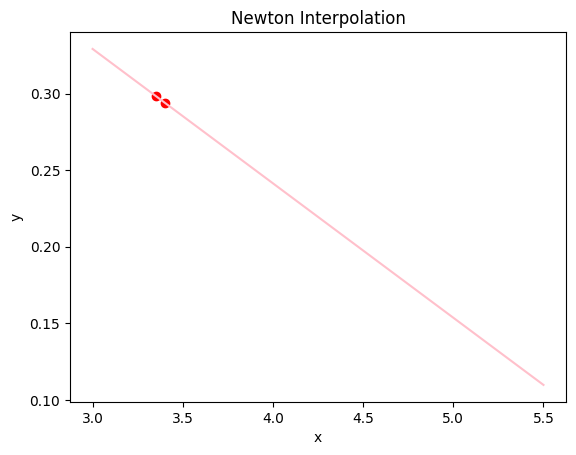

P(x) = 0.30 + -0.09(x - 3.35000) + 0.02(x - 3.35000)(x - 3.40000)
P(x) = 0.87656x^0 - 0.25608x^1 + 0.02493x^2


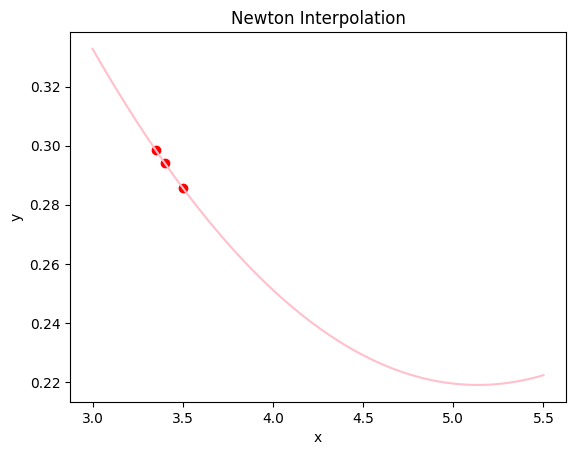

P(x) = 0.30 + -0.09(x - 3.35000) + 0.02(x - 3.35000)(x - 3.40000) + -0.01(x - 3.35000)(x - 3.40000)(x - 3.50000)
P(x) = 1.12107x^0 - 0.47084x^1 + 0.08780x^2 - 0.00613x^3


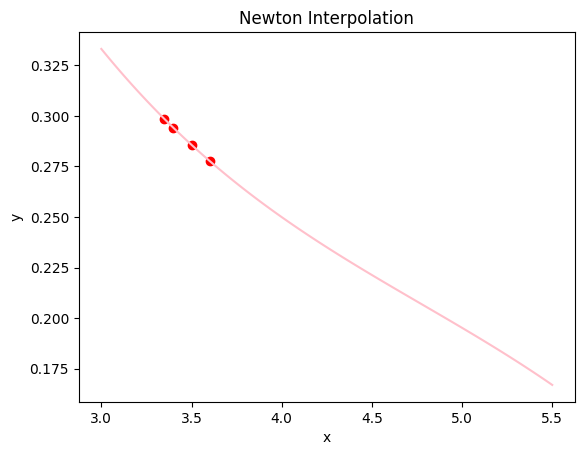

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mynewtonint(data):
  n = len(data)
  x_values = [point[0] for point in data]
  y_values = [point[1] for point in data]

  # Calculate divided differences
  f = np.zeros((n, n))
  f[:,0] = y_values
  for j in range(1,n):
    for i in range(n-j):
      f[i][j] = (f[i+1][j-1] - f[i][j-1]) / (x_values[i+j]-x_values[i])

  # Extract coefficients
  coeffs = f[0,:]

  # Print the polynomial equation
  equation = "P(x) = "
  for i, c in enumerate(coeffs):
    if i > 0:
      equation += " + "
    equation += f"{c:.2f}"
    for j in range(i):
      equation += f"(x - {x_values[j]:.5f})"
  print(equation)

  # Expand the polynomial and collect coefficients
  expanded_coeffs = expand_polynomial(coeffs, x_values)

  # Print the expanded polynomial equation
  expanded_equation = "P(x) = "
  for i, c in enumerate(expanded_coeffs):
    if i > 0:
      if c >= 0:
        expanded_equation += " + "
      else:
        expanded_equation += " - "
        c = -c
    expanded_equation += f"{c:.5f}x^{i}"
  print(expanded_equation)

  # Generate points for plotting
  x_range = np.linspace(3,5.5, 100)
  y_interp = [newton_interpolation(x_val, x_values, coeffs) for x_val in x_range]

  # Plot the polynomial and the data points
  plt.plot(x_range, y_interp,color='pink')
  plt.scatter(x_values, y_values, color='red')
  plt.title('Newton Interpolation')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return coeffs

def newton_interpolation(x, x_values, coeffs):
  n = len(x_values)
  result = coeffs[n-1]
  for i in range(n-2, -1, -1):
    result = result * (x - x_values[i]) + coeffs[i]
  return result

def expand_polynomial(coeffs, x_values):
  n = len(coeffs)
  expanded_coeffs = [0] * n
  for i in range(n):
    term = [coeffs[i]]
    for j in range(i):
      term = poly_mul(term, [-x_values[j], 1])
    expanded_coeffs = poly_add(expanded_coeffs, term)
  return expanded_coeffs

def poly_mul(p1, p2):
  n1 = len(p1)
  n2 = len(p2)
  result = [0] * (n1 + n2 - 1)
  for i in range(n1):
    for j in range(n2):
      result[i + j] += p1[i] * p2[j]
  return result

def poly_add(p1, p2):
  n1 = len(p1)
  n2 = len(p2)
  result = [0] * max(n1, n2)
  for i in range(n1):
    result[i] += p1[i]
  for i in range(n2):
    result[i] += p2[i]
  return result

data1 = [[3.35,0.298507], [3.40,0.294118]]
coeffs1 = mynewtonint(data1)

data2 = [[3.35,0.298507], [3.40,0.294118],[3.50,0.285714]]
coeffs2 = mynewtonint(data2)

data3 = [[3.35,0.298507], [3.40,0.294118],[3.50,0.285714],[3.60,0.277778]]
coeffs3 = mynewtonint(data3)

# **Part - (c) Comparison with y=1/x**

P(x) = 0.30 + -0.09(x - 3.35000)
P(x) = 0.59257x^0 - 0.08778x^1


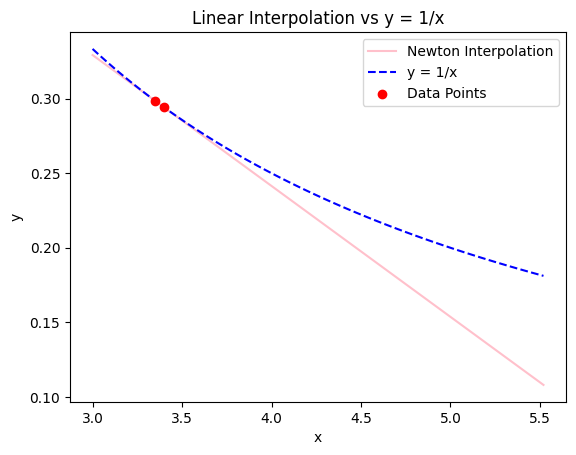

P(x) = 0.30 + -0.09(x - 3.35000) + 0.02(x - 3.35000)(x - 3.40000)
P(x) = 0.87656x^0 - 0.25608x^1 + 0.02493x^2


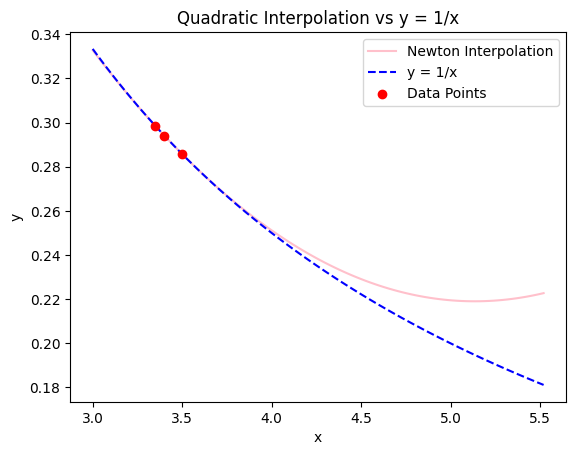

P(x) = 0.30 + -0.09(x - 3.35000) + 0.02(x - 3.35000)(x - 3.40000) + -0.01(x - 3.35000)(x - 3.40000)(x - 3.50000)
P(x) = 1.12107x^0 - 0.47084x^1 + 0.08780x^2 - 0.00613x^3


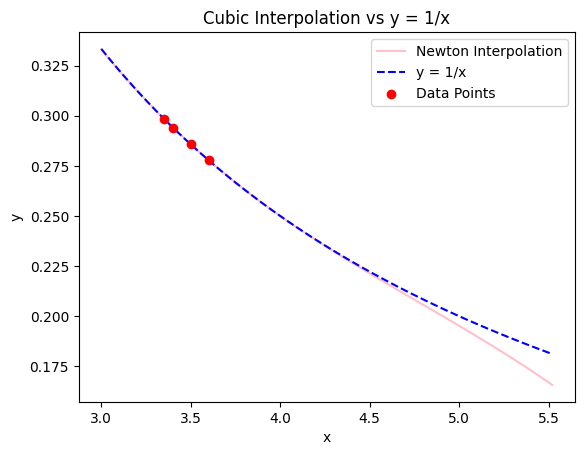

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mynewtonint(data, plot_title):
    n = len(data)
    x_values = [point[0] for point in data]
    y_values = [point[1] for point in data]

    # Calculate divided differences
    f = np.zeros((n, n))
    f[:, 0] = y_values
    for j in range(1, n):
        for i in range(n-j):
            f[i][j] = (f[i+1][j-1] - f[i][j-1]) / (x_values[i+j] - x_values[i])

    # Extract coefficients
    coeffs = f[0, :]

    # Print the polynomial equation
    equation = "P(x) = "
    for i, c in enumerate(coeffs):
        if i > 0:
            equation += " + "
        equation += f"{c:.2f}"
        for j in range(i):
            equation += f"(x - {x_values[j]:.5f})"
    print(equation)

    # Expand the polynomial and collect coefficients
    expanded_coeffs = expand_polynomial(coeffs, x_values)

    # Print the expanded polynomial equation
    expanded_equation = "P(x) = "
    for i, c in enumerate(expanded_coeffs):
        if i > 0:
            if c >= 0:
                expanded_equation += " + "
            else:
                expanded_equation += " - "
                c = -c
        expanded_equation += f"{c:.5f}x^{i}"
    print(expanded_equation)


    x_range = np.linspace(3, 5.52, 100)
    y_interp = [newton_interpolation(x_val, x_values, coeffs) for x_val in x_range]


    y_actual = 1 / x_range

    plt.plot(x_range, y_interp, color='pink', label='Newton Interpolation')
    plt.plot(x_range, y_actual, color='blue', linestyle='--', label='y = 1/x')  # Add y=1/x
    plt.scatter(x_values, y_values, color='red', zorder=5, label='Data Points')

    plt.title(plot_title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    return coeffs

def newton_interpolation(x, x_values, coeffs):
    n = len(x_values)
    result = coeffs[n-1]
    for i in range(n-2, -1, -1):
        result = result * (x - x_values[i]) + coeffs[i]
    return result

def expand_polynomial(coeffs, x_values):
    n = len(coeffs)
    expanded_coeffs = [0] * n
    for i in range(n):
        term = [coeffs[i]]
        for j in range(i):
            term = poly_mul(term, [-x_values[j], 1])
        expanded_coeffs = poly_add(expanded_coeffs, term)
    return expanded_coeffs

def poly_mul(p1, p2):
    n1 = len(p1)
    n2 = len(p2)
    result = [0] * (n1 + n2 - 1)
    for i in range(n1):
        for j in range(n2):
            result[i + j] += p1[i] * p2[j]
    return result

def poly_add(p1, p2):
    n1 = len(p1)
    n2 = len(p2)
    result = [0] * max(n1, n2)
    for i in range(n1):
        result[i] += p1[i]
    for i in range(n2):
        result[i] += p2[i]
    return result

# Data sets for different interpolation orders
data1 = [[3.35, 0.298507], [3.40, 0.294118]]
coeffs1 = mynewtonint(data1, 'Linear Interpolation vs y = 1/x')

data2 = [[3.35, 0.298507], [3.40, 0.294118], [3.50, 0.285714]]
coeffs2 = mynewtonint(data2, 'Quadratic Interpolation vs y = 1/x')

data3 = [[3.35, 0.298507], [3.40, 0.294118], [3.50, 0.285714], [3.60, 0.277778]]
coeffs3 = mynewtonint(data3, 'Cubic Interpolation vs y = 1/x')


# Interpolation Problem

## Problem Statement:

Given the following table of data:

| x    | 0    | 1    | 2    | 2.5  | 3    | 3.5  | 4    |
|------|------|------|------|------|------|------|------|
| f(x) | 2.5  | 0.5  | 0.5  | 1.5  | 1.5  | 1.125| 0    |

### Tasks:

**(a)** Interpolate successive points by straight line segments. This method is known as **piecewise linear interpolation**.

**(b)** On each of the following three subintervals of \( x \): \([0, 2]\), \([2, 3]\), and \([3, 4]\), interpolate using both **Lagrange’s quadratic polynomial** and **Newton’s divided-difference interpolation polynomial**.

**(c)** Plot the results of both methods covering all the three subintervals on the same graph, and compare them.


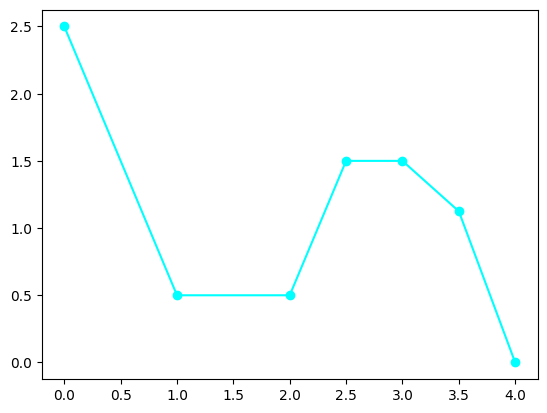

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

poly_fit=[2.5,0.5,0.5,1.5,1.5,1.125,0]
poly_fit_x=[0 ,1 ,2 ,2.5 ,3 ,3.5 ,4]
plt.plot(poly_fit_x, poly_fit, marker='o',color='cyan')

P(x) = 2.50000x^0 + -3.00000x^1 + 1.00000x^2
Coefficients: [2.5, -3.0, 1.0]


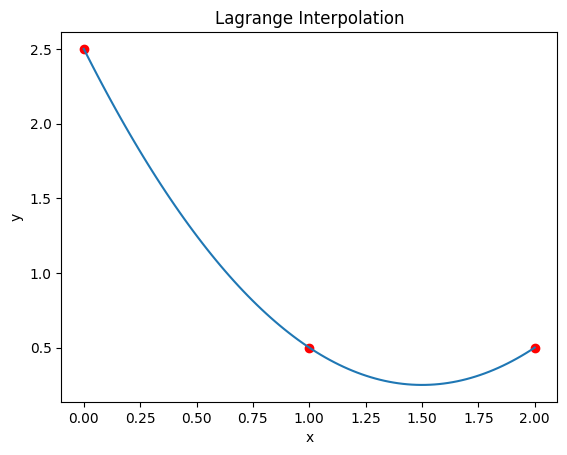

P(x) = -13.50000x^0 + 11.00000x^1 + -2.00000x^2
Coefficients: [-13.5, 11.0, -2.0]


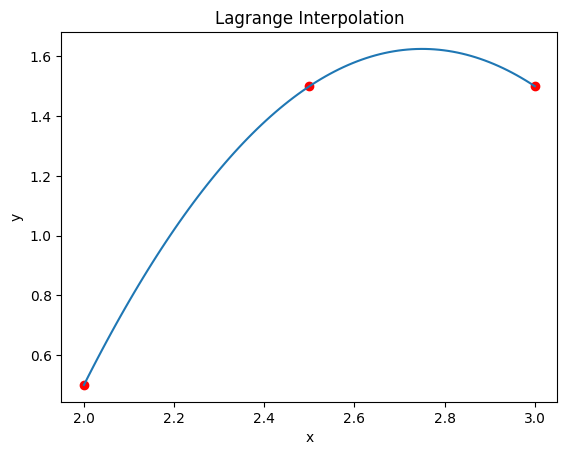

P(x) = -12.00000x^0 + 9.00000x^1 + -1.50000x^2
Coefficients: [-12.0, 9.0, -1.5]


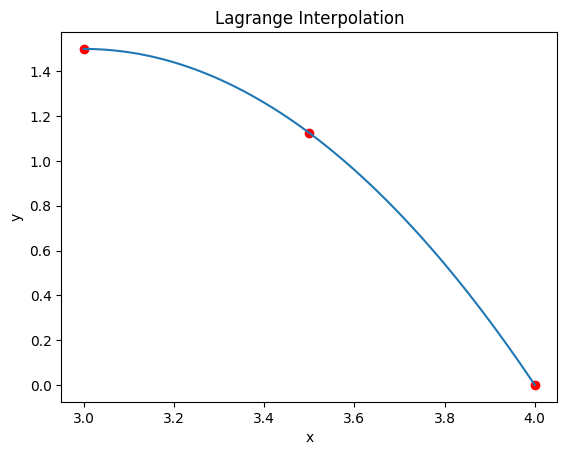

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def mypolyint(data):
  n = len(data)
  x_values = [point[0] for point in data]
  y_values = [point[1] for point in data]
  coeffs = [0] * n
  for i in range(n):
    p = [1]
    for j in range(n):
      if i != j:
        p = poly_mul(p, [-x_values[j] / (x_values[i] - x_values[j]), 1 / (x_values[i] - x_values[j])])
    coeffs = poly_add(coeffs, poly_mul_scalar(p, y_values[i]))

  equation = "P(x) = "
  for i, c in enumerate(coeffs):
    if i > 0:
      equation += " + "
    equation += f"{c:.5f}x^{i}"
  print(equation)
  print("Coefficients:", coeffs)

  x_range=np.linspace(min(x_values), max(x_values), 100)
  y_interp = [lagrange_interpolation(x_val, x_values, y_values) for x_val in x_range]
  plt.plot(x_range, y_interp)
  plt.scatter(x_values, y_values, color='red')
  plt.title('Lagrange Interpolation')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return coeffs

def lagrange_interpolation(x, x_values, y_values):
  n = len(x_values)
  interpolated_y = 0
  for i in range(n):
    L_i = 1
    for j in range(n):
      if i != j:
        L_i *= (x - x_values[j]) / (x_values[i] - x_values[j])
    interpolated_y += y_values[i] * L_i
  return interpolated_y


def poly_mul(p1, p2):
  n1 = len(p1)
  n2 = len(p2)
  result = [0] * (n1 + n2 - 1)
  for i in range(n1):
    for j in range(n2):
      result[i + j] += p1[i] * p2[j]
  return result

def poly_add(p1, p2):
  n1 = len(p1)
  n2 = len(p2)
  result = [0] * max(n1, n2)
  for i in range(n1):
    result[i] += p1[i]
  for i in range(n2):
    result[i] += p2[i]
  return result

def poly_mul_scalar(p, s):
  return [c * s for c in p]

data1 = [[0,2.5],[1,0.5],[2,0.5]]
coeffs1 = mypolyint(data1)

data2 = [[2,0.5],[2.5,1.5],[3,1.5]]
coeffs2 = mypolyint(data2)

data3 = [[3,1.5],[3.5,1.125],[4,0]]
coeffs3 = mypolyint(data3)




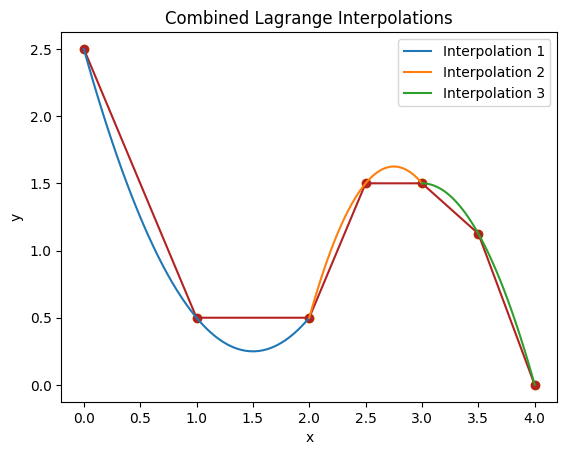

In [ ]:
poly_fit=[2.5,0.5,0.5,1.5,1.5,1.125,0]
poly_fit_x=[0 ,1 ,2 ,2.5 ,3 ,3.5 ,4]
plt.plot(poly_fit_x, poly_fit, marker='o',color='firebrick')

plt.plot(x_range1, y_interp1, label='Interpolation 1')
plt.plot(x_range2, y_interp2, label='Interpolation 2')
plt.plot(x_range3, y_interp3, label='Interpolation 3')
plt.scatter([point[0] for point in data1] + [point[0] for point in data2] + [point[0] for point in data3],
            [point[1] for point in data1] + [point[1] for point in data2] + [point[1] for point in data3], color='yellow')
plt.title('Combined Lagrange Interpolations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


P(x) = 2.50 + -2.00(x - 0.00000) + 1.00(x - 0.00000)(x - 1.00000)
P(x) = 2.50000x^0 - 3.00000x^1 + 1.00000x^2


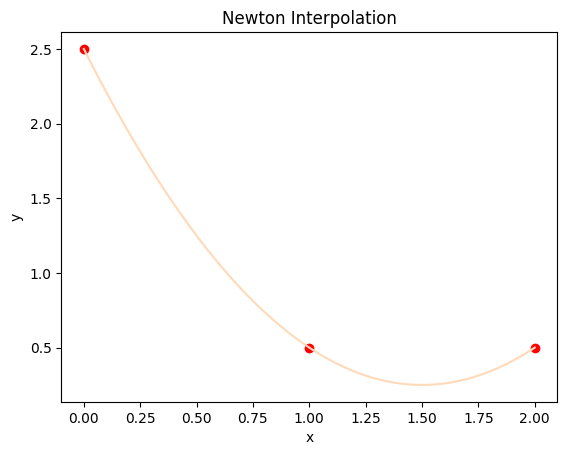

P(x) = 0.50 + 2.00(x - 2.00000) + -2.00(x - 2.00000)(x - 2.50000)
P(x) = -13.50000x^0 + 11.00000x^1 - 2.00000x^2


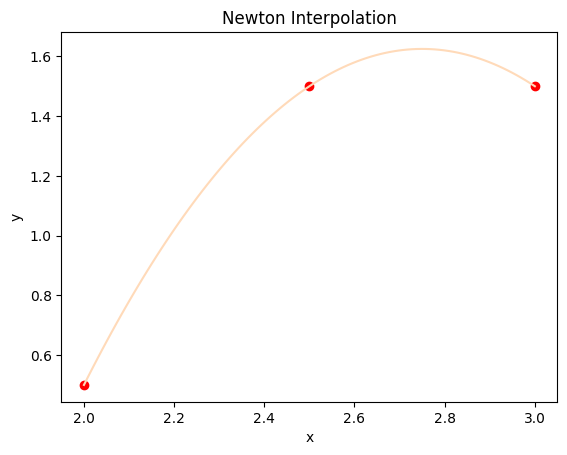

P(x) = 1.50 + -0.75(x - 3.00000) + -1.50(x - 3.00000)(x - 3.50000)
P(x) = -12.00000x^0 + 9.00000x^1 - 1.50000x^2


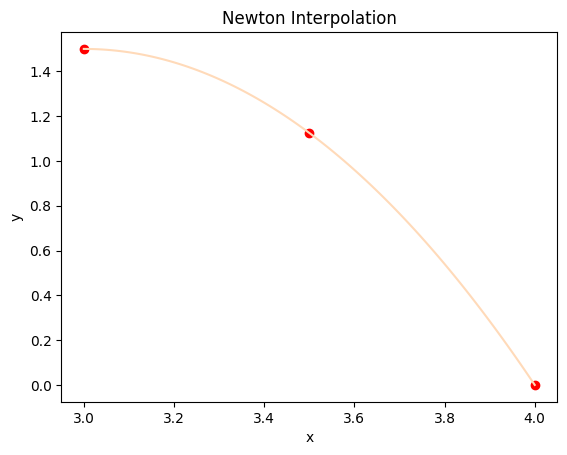

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mynewtonint(data):
  n = len(data)
  x_values = [point[0] for point in data]
  y_values = [point[1] for point in data]

  # Calculate divided differences
  f = np.zeros((n, n))
  f[:,0] = y_values
  for j in range(1,n):
    for i in range(n-j):
      f[i][j] = (f[i+1][j-1] - f[i][j-1]) / (x_values[i+j]-x_values[i])

  # Extract coefficients
  coeffs = f[0,:]

  # Print the polynomial equation
  equation = "P(x) = "
  for i, c in enumerate(coeffs):
    if i > 0:
      equation += " + "
    equation += f"{c:.2f}"
    for j in range(i):
      equation += f"(x - {x_values[j]:.5f})"
  print(equation)

  # Expand the polynomial and collect coefficients
  expanded_coeffs = expand_polynomial(coeffs, x_values)

  # Print the expanded polynomial equation
  expanded_equation = "P(x) = "
  for i, c in enumerate(expanded_coeffs):
    if i > 0:
      if c >= 0:
        expanded_equation += " + "
      else:
        expanded_equation += " - "
        c = -c
    expanded_equation += f"{c:.5f}x^{i}"
  print(expanded_equation)

  # Generate points for plotting
  x_range = np.linspace(min(x_values), max(x_values), 100)
  y_interp = [newton_interpolation(x_val, x_values, coeffs) for x_val in x_range]

  # Plot the polynomial and the data points
  plt.plot(x_range, y_interp,color='peachpuff')
  plt.scatter(x_values, y_values, color='red')
  plt.title('Newton Interpolation')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return coeffs

def newton_interpolation(x, x_values, coeffs):
  n = len(x_values)
  result = coeffs[n-1]
  for i in range(n-2, -1, -1):
    result = result * (x - x_values[i]) + coeffs[i]
  return result

def expand_polynomial(coeffs, x_values):
  n = len(coeffs)
  expanded_coeffs = [0] * n
  for i in range(n):
    term = [coeffs[i]]
    for j in range(i):
      term = poly_mul(term, [-x_values[j], 1])
    expanded_coeffs = poly_add(expanded_coeffs, term)
  return expanded_coeffs

def poly_mul(p1, p2):
  n1 = len(p1)
  n2 = len(p2)
  result = [0] * (n1 + n2 - 1)
  for i in range(n1):
    for j in range(n2):
      result[i + j] += p1[i] * p2[j]
  return result

def poly_add(p1, p2):
  n1 = len(p1)
  n2 = len(p2)
  result = [0] * max(n1, n2)
  for i in range(n1):
    result[i] += p1[i]
  for i in range(n2):
    result[i] += p2[i]
  return result

data1 = [[0,2.5],[1,0.5],[2,0.5]]
coeffs1 = mynewtonint(data1)

data2 = [[2,0.5],[2.5,1.5],[3,1.5]]
coeffs2 = mynewtonint(data2)

data3 = [[3,1.5],[3.5,1.125],[4,0]]
coeffs3 = mynewtonint(data3)





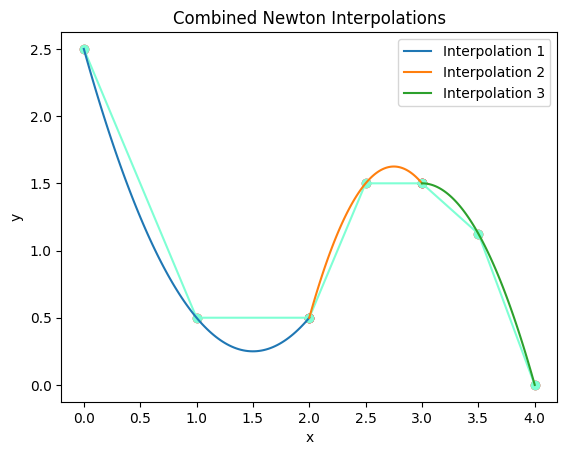

In [ ]:
poly_fit=[2.5,0.5,0.5,1.5,1.5,1.125,0]
poly_fit_x=[0 ,1 ,2 ,2.5 ,3 ,3.5 ,4]
plt.plot(poly_fit_x, poly_fit, marker='o',color='aquamarine')

plt.plot(x_range1, y_interp1, label='Interpolation 1')
plt.plot(x_range2, y_interp2, label='Interpolation 2')
plt.plot(x_range3, y_interp3, label='Interpolation 3')
plt.scatter([point[0] for point in data1] + [point[0] for point in data2] + [point[0] for point in data3],
            [point[1] for point in data1] + [point[1] for point in data2] + [point[1] for point in data3], color='red')
plt.title('Combined Newton Interpolations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Part - (c)

Write a function that implements a least square polynomial fit. The function
should take in two vectors x and y (each of size n x1), and the degree of the
polynomial (m&lt;n) and output the coefficient vector of the polynomial that
minimizes the least square error.

Polynomial coefficients: [ 2.08571429 -0.97142857  0.14285714]


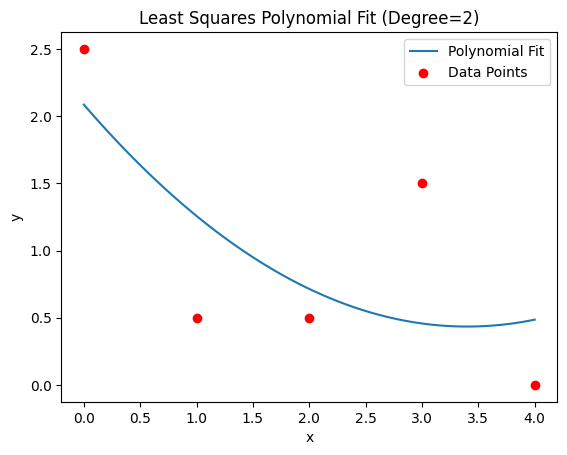

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares_polyfit_manual(x, y, degree):

    A = np.zeros((len(x), degree + 1))
    for i in range(degree + 1):
        A[:, i] = x**i


    ATA = np.dot(A.T, A)

    ATy = np.dot(A.T, y)


    coeffs = np.dot(np.linalg.inv(ATA), ATy)

    return coeffs

x = np.array([0, 1, 2, 3, 4])
y = np.array([2.5, 0.5, 0.5, 1.5, 0.0])

degree = 2
coeffs = least_squares_polyfit_manual(x, y, degree)

print("Polynomial coefficients:", coeffs)

x_range = np.linspace(min(x), max(x), 100)
y_fit = np.polyval(coeffs[::-1], x_range)

plt.plot(x_range, y_fit, label='Polynomial Fit')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Least Squares Polynomial Fit (Degree=2)')
plt.show()